<a href="https://colab.research.google.com/github/haider460/machineLearning/blob/main/Attrition_Model_1_26_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1-Importing libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

#**2-Processing**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Train_data = pd.read_csv('/content/drive/MyDrive/Freelancer Projects/Rohit Sam/Headcount Train Aug Ver2.csv',encoding = 'latin')

In [ ]:
Test_data = pd.read_csv('/content/drive/MyDrive/Freelancer Projects/Rohit Sam/Headcount Trest Sep Ver2.csv',encoding = 'latin')

In [ ]:
# same processing code (2.2 to 2.9) of Training_Data is exacute for Test Date
Train_data = Test_data

## 2.2- **Drop Index Colum**

In [ ]:
Train_data=Train_data.reset_index()
Train_data1=Train_data.drop(columns=['index'])

##**2.2- Drop input features**

In [ ]:
Train_data=Train_data1.drop(columns=['termination_date'])

In [ ]:
Train_data=Train_data.drop(columns=['Effective_Date'])

In [ ]:
Train_data.columns

Index(['Effective_Date', 'Termination_Status', 'employee_id', 'region',
       'region_reporting', 'location', 'location_country', 'location_tier',
       'location_cost', 'location_reporting', 'locations_wf', 'restated_LOB',
       'tenure', 'age', 'generation', 'qc_non_qc', 'is_people_manager',
       'sales_role', 'job_family', 'job_family_group', 'white_nonwhite',
       'adjusted_ethnicity', 'gender', 'management_level',
       'management_level_category', 'employee_level2', 'employee_level3',
       'management_chain_level_employee', 'add_reason', 'Job_level',
       'pay_rate_type', 'Full_Time_vs_Part_Time', 'sales_sub_role',
       'fte_percentage', 'scheduled_weekly_hours', 'ccq', 'is_DQC',
       'Stock_Eligible', 'remote_location', 'Customer_Facing', 'Plan_Category',
       'total_bonus_amount_USD', 'total_allowance_amount_USD',
       'total_base_pay_amount_usd', 'compensation_usd',
       'competitive_range_low_base_salary',
       'market_reference_point_base_salary',
   

##**2.3 Convert target variable into binary Form**

In [ ]:
Train_data['Termination_Status'].replace({'No': 0, 'Yes': 1},inplace = True)


##**2.4 Imbalance problem**

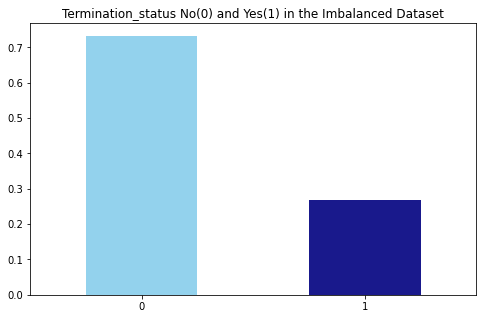

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
Train_data.Termination_Status.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Termination_status No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

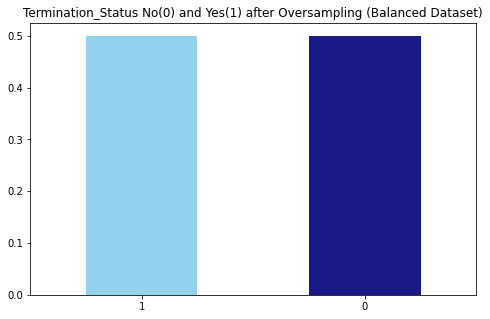

In [ ]:
from sklearn.utils import resample
no = Train_data[Train_data.Termination_Status == 0]
yes = Train_data[Train_data.Termination_Status == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])
fig = plt.figure(figsize = (8,5))
oversampled.Termination_Status.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Termination_Status No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

##**2.5 Check Missing Value**

In [ ]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
ccq,5962,0.331406
Avg_GPTW,312,0.017343
eNPS,166,0.009227
Time_to_retirement_in_years,6,0.000334


##**2.6 Hot Encoding**

In [ ]:
oversampled.select_dtypes(include=['object']).columns

Index(['Effective_Date', 'region', 'region_reporting', 'location',
       'location_country', 'location_tier', 'location_cost',
       'location_reporting', 'locations_wf', 'restated_LOB', 'generation',
       'qc_non_qc', 'is_people_manager', 'sales_role', 'job_family',
       'job_family_group', 'white_nonwhite', 'adjusted_ethnicity', 'gender',
       'management_level', 'management_level_category', 'employee_level2',
       'employee_level3', 'add_reason', 'Job_level', 'pay_rate_type',
       'Full_Time_vs_Part_Time', 'sales_sub_role', 'is_DQC', 'Stock_Eligible',
       'remote_location', 'Customer_Facing', 'Plan_Category',
       'competitive_base_pay_market_position',
       'competitive_total_target_cash_market_position', 'bonus_eligible',
       'Change_in_Individual_management_level_rolling_12_months_IM',
       'Is_people_manager_change_rolling_12_months_IM',
       'Change_in_job_level_rolling_12_months_IM',
       'current_vs_average_compensation_job_level',
       'current_

In [ ]:
# Impute categorical var with Mode
oversampled['region'] = oversampled['region'].fillna(oversampled['region'].mode()[0])
oversampled['region_reporting'] = oversampled['region_reporting'].fillna(oversampled['region_reporting'].mode()[0])
oversampled['location'] = oversampled['location'].fillna(oversampled['location'].mode()[0])
oversampled['location_country'] = oversampled['location_country'].fillna(oversampled['location_country'].mode()[0])
oversampled['location_tier'] = oversampled['location_tier'].fillna(oversampled['location_tier'].mode()[0])
oversampled['location_cost'] = oversampled['location_cost'].fillna(oversampled['location_cost'].mode()[0])
oversampled['location_reporting'] = oversampled['location_reporting'].fillna(oversampled['location_reporting'].mode()[0])
oversampled['locations_wf'] = oversampled['locations_wf'].fillna(oversampled['locations_wf'].mode()[0])
oversampled['restated_LOB'] = oversampled['restated_LOB'].fillna(oversampled['restated_LOB'].mode()[0])
oversampled['generation'] = oversampled['generation'].fillna(oversampled['generation'].mode()[0])
oversampled['qc_non_qc'] = oversampled['qc_non_qc'].fillna(oversampled['qc_non_qc'].mode()[0])
oversampled['is_people_manager'] = oversampled['is_people_manager'].fillna(oversampled['is_people_manager'].mode()[0])
oversampled['sales_role'] = oversampled['sales_role'].fillna(oversampled['sales_role'].mode()[0])
oversampled['job_family'] = oversampled['job_family'].fillna(oversampled['job_family'].mode()[0])
oversampled['job_family_group'] = oversampled['job_family_group'].fillna(oversampled['job_family_group'].mode()[0])
oversampled['white_nonwhite'] = oversampled['white_nonwhite'].fillna(oversampled['white_nonwhite'].mode()[0])
oversampled['adjusted_ethnicity'] = oversampled['adjusted_ethnicity'].fillna(oversampled['adjusted_ethnicity'].mode()[0])
oversampled['gender'] = oversampled['gender'].fillna(oversampled['gender'].mode()[0])
oversampled['management_level'] = oversampled['management_level'].fillna(oversampled['management_level_category'].mode()[0])
oversampled['management_level_category'] = oversampled['management_level_category'].fillna(oversampled['management_level'].mode()[0])
oversampled['employee_level2'] = oversampled['employee_level2'].fillna(oversampled['employee_level2'].mode()[0])
oversampled['employee_level3'] = oversampled['employee_level3'].fillna(oversampled['employee_level3'].mode()[0])
oversampled['add_reason'] = oversampled['add_reason'].fillna(oversampled['add_reason'].mode()[0])
oversampled['Job_level'] = oversampled['Job_level'].fillna(oversampled['Job_level'].mode()[0])
oversampled['pay_rate_type'] = oversampled['pay_rate_type'].fillna(oversampled['pay_rate_type'].mode()[0])
oversampled['Full_Time_vs_Part_Time'] = oversampled['Full_Time_vs_Part_Time'].fillna(oversampled['Full_Time_vs_Part_Time'].mode()[0])
oversampled['sales_sub_role'] = oversampled['sales_sub_role'].fillna(oversampled['sales_sub_role'].mode()[0])
oversampled['is_DQC'] = oversampled['is_DQC'].fillna(oversampled['is_DQC'].mode()[0])
oversampled['Stock_Eligible'] = oversampled['Stock_Eligible'].fillna(oversampled['Stock_Eligible'].mode()[0])
oversampled['remote_location'] = oversampled['remote_location'].fillna(oversampled['remote_location'].mode()[0])
oversampled['Customer_Facing'] = oversampled['Customer_Facing'].fillna(oversampled['Customer_Facing'].mode()[0])
oversampled['Plan_Category'] = oversampled['Plan_Category'].fillna(oversampled['Plan_Category'].mode()[0])
oversampled['competitive_base_pay_market_position'] = oversampled['competitive_base_pay_market_position'].fillna(oversampled['competitive_base_pay_market_position'].mode()[0])
oversampled['competitive_total_target_cash_market_position'] = oversampled['competitive_total_target_cash_market_position'].fillna(oversampled['competitive_total_target_cash_market_position'].mode()[0])
oversampled['bonus_eligible'] = oversampled['bonus_eligible'].fillna(oversampled['bonus_eligible'].mode()[0])
oversampled['Is_people_manager_change_rolling_12_months_IM'] = oversampled['Is_people_manager_change_rolling_12_months_IM'].fillna(oversampled['Is_people_manager_change_rolling_12_months_IM'].mode()[0])
oversampled['Change_in_job_level_rolling_12_months_IM'] = oversampled['Change_in_job_level_rolling_12_months_IM'].fillna(oversampled['Change_in_job_level_rolling_12_months_IM'].mode()[0])

oversampled['current_vs_average_compensation_job_level'] = oversampled['current_vs_average_compensation_job_level'].fillna(oversampled['current_vs_average_compensation_job_level'].mode()[0])

oversampled['current_vs_average_tenure_job_level'] = oversampled['current_vs_average_tenure_job_level'].fillna(oversampled['current_vs_average_tenure_job_level'].mode()[0])

oversampled['current_vs_average_tenure'] = oversampled['current_vs_average_tenure'].fillna(oversampled['current_vs_average_tenure'].mode()[0])

oversampled['touchpoint_sentiment'] = oversampled['touchpoint_sentiment'].fillna(oversampled['touchpoint_sentiment'].mode()[0])

oversampled['Mgt_Level_one_level_up_change_rolling_12_months'] = oversampled['Mgt_Level_one_level_up_change_rolling_12_months'].fillna(oversampled['Mgt_Level_one_level_up_change_rolling_12_months'].mode()[0])

oversampled['Mgt_Level_two_level_up_change_rolling_12_months'] = oversampled['Mgt_Level_two_level_up_change_rolling_12_months'].fillna(oversampled['Mgt_Level_two_level_up_change_rolling_12_months'].mode()[0])

oversampled['ER_PIP_Case'] = oversampled['ER_PIP_Case'].fillna(oversampled['ER_PIP_Case'].mode()[0])










 
 

In [ ]:
oversampled

,Effective_Date,Termination_Status,employee_id,region,region_reporting,location,location_country,location_tier,location_cost,location_reporting,locations_wf,restated_LOB,tenure,age,generation,qc_non_qc,is_people_manager,sales_role,job_family,job_family_group,white_nonwhite,adjusted_ethnicity,gender,management_level,management_level_category,employee_level2,employee_level3,management_chain_level_employee,add_reason,Job_level,pay_rate_type,Full_Time_vs_Part_Time,sales_sub_role,fte_percentage,scheduled_weekly_hours,ccq,is_DQC,Stock_Eligible,remote_location,Customer_Facing,...,total_allowance_amount_USD,total_base_pay_amount_usd,compensation_usd,competitive_range_low_base_salary,market_reference_point_base_salary,competitive_range_high_base_salary,competitive_range_low_total_target_cash,market_reference_point_total_target_cash,competitive_range_high_total_target_cash,competitive_base_pay_market_position,competitive_total_target_cash_market_position,base_pay_compa_ratio,total_target_cash_compa_ratio,Time_in_Job_Profile,Employee_Management_Level,bonus_eligible,promotion_count_rolling_2_years,transfer_count_rolling_2_years,change_job_type_count_rolling_2_years,time_since_last_promotion_in_years,time_since_last_transfer_in_years,time_since_last_change_job_type_in_years,Change_in_Individual_management_level_rolling_12_months_IM,Is_people_manager_change_rolling_12_months_IM,Change_in_job_level_rolling_12_months_IM,current_vs_average_compensation_job_level,current_vs_average_tenure_job_level,current_vs_average_tenure,%_Abover_or_Below_Average_Compensation_job_level,%_Abover_or_Below_Average_Tenure_job_level,%_Abover_or_Below_Average_Tenure_Company,eNPS,Avg_GPTW,touchpoint_sentiment,Time_to_retirement_in_years,Mgt_Level_one_level_up_change_rolling_12_months,Mgt_Level_two_level_up_change_rolling_12_months,time_with_current_manager_in_years,ER_PIP_Case,time_since_compensation_change_in_years
0,9/30/2020,0,15,Americas,Americas,Fort Lauderdale,United States of America,Tier 1,High-Cost,Fort Lauderdale,Fort Lauderdale,Finance,5.17,52,GenX,NON QC,Yes,No Sales Role,Revenue Accounting,Finance,White,White,Male,Director,Director,Director,Director,6,Addition,M5,Salary,Full Time,No Sales Sub Role,100.0,40,100.0,Unknown,Yes,No,No,...,0.0,186104.79,214020.51,146354.0,182943.0,219532.0,175448.000,219310.00,263172.000,At Market,At Market,1.017,0.976,1.998631,6,Yes,0,0,0,5.170000,5.17,4.42,No,No,No,Higher than average,Lower than average,Higher than average,0.41,-32.14,21.74,-6.67,66.0,positive,13.0,No,No,1.75,No,0.42
1,9/30/2020,0,16,Americas,Americas,Fort Lauderdale,United States of America,Tier 1,High-Cost,Fort Lauderdale,Fort Lauderdale,Operations,28.17,51,GenX,NON QC,Yes,No Sales Role,Technical Program Management,Engineering,White,White,Female,Director,Director,Director,Director,6,Addition,M5,Salary,Full Time,No Sales Sub Role,100.0,40,100.0,Unknown,Yes,No,No,...,0.0,192592.76,231111.31,164800.0,206000.0,247200.0,204000.000,255000.00,306000.000,At Market,At Market,0.935,0.906,0.038329,6,Yes,1,0,2,0.038356,28.17,0.39,Yes,Yes,Yes,Higher than average,Higher than average,Higher than average,8.41,144.29,563.34,46.15,71.0,positive,14.0,Yes,Yes,0.33,No,0.00
2,9/30/2020,0,21,Americas,Americas,Fort Lauderdale,United States of America,Tier 1,High-Cost,Fort Lauderdale,Fort Lauderdale,Finance,16.17,55,GenX,NON QC,No,No Sales Role,Strategic Alliances,Product,Non White,Two or More Races,Male,Individual Contributor,Individual Contributor/Support,Individual Contributor/Manager,Individual Contributor,6,Addition,IC5,Salary,Full Time,No Sales Sub Role,100.0,40,100.0,Unknown,Yes,No,No,...,0.0,195936.90,244921.13,133607.0,167009.0,200411.0,204625.000,255781.00,306937.000,Above Market,At Market,1.173,0.958,1.913757,6,Yes,1,0,1,1.915068,16.17,0.16,No,No,No,Higher than average,Higher than average,Higher than average,63.50,177.56,280.76,41.80,79.0,positive,10.0,Yes,Yes,0.08,No,0.42
3,9/30/2020,0,55,Americas,Americas,Fort Lauderdale,United States of America,Tier 1,High-Cost,For

In [ ]:
oversampled

In [ ]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [ ]:
oversampled

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

##**2.7 Outlier detection**

In [ ]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Termination_Status                                    1.00
employee_id                                        6491.00
region                                                1.00
region_reporting                                      2.00
location                                             50.00
                                                    ...   
Mgt_Level_one_level_up_change_rolling_12_months       1.00
Mgt_Level_two_level_up_change_rolling_12_months       1.00
time_with_current_manager_in_years                    1.33
ER_PIP_Case                                           0.00
time_since_compensation_change_in_years               0.24
Length: 81, dtype: float64


In [ ]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(1337, 81)

In [ ]:
MiceImputed

,Termination_Status,employee_id,region,region_reporting,location,location_country,location_tier,location_cost,location_reporting,locations_wf,restated_LOB,tenure,age,generation,qc_non_qc,is_people_manager,sales_role,job_family,job_family_group,white_nonwhite,adjusted_ethnicity,gender,management_level,management_level_category,employee_level2,employee_level3,management_chain_level_employee,add_reason,Job_level,pay_rate_type,Full_Time_vs_Part_Time,sales_sub_role,fte_percentage,scheduled_weekly_hours,ccq,is_DQC,Stock_Eligible,remote_location,Customer_Facing,Plan_Category,...,total_allowance_amount_USD,total_base_pay_amount_usd,compensation_usd,competitive_range_low_base_salary,market_reference_point_base_salary,competitive_range_high_base_salary,competitive_range_low_total_target_cash,market_reference_point_total_target_cash,competitive_range_high_total_target_cash,competitive_base_pay_market_position,competitive_total_target_cash_market_position,base_pay_compa_ratio,total_target_cash_compa_ratio,Time_in_Job_Profile,Employee_Management_Level,bonus_eligible,promotion_count_rolling_2_years,transfer_count_rolling_2_years,change_job_type_count_rolling_2_years,time_since_last_promotion_in_years,time_since_last_transfer_in_years,time_since_last_change_job_type_in_years,Change_in_Individual_management_level_rolling_12_months_IM,Is_people_manager_change_rolling_12_months_IM,Change_in_job_level_rolling_12_months_IM,current_vs_average_compensation_job_level,current_vs_average_tenure_job_level,current_vs_average_tenure,%_Abover_or_Below_Average_Compensation_job_level,%_Abover_or_Below_Average_Tenure_job_level,%_Abover_or_Below_Average_Tenure_Company,eNPS,Avg_GPTW,touchpoint_sentiment,Time_to_retirement_in_years,Mgt_Level_one_level_up_change_rolling_12_months,Mgt_Level_two_level_up_change_rolling_12_months,time_with_current_manager_in_years,ER_PIP_Case,time_since_compensation_change_in_years
14,0.0,31720.0,0.0,3.0,3.0,17.0,1.0,1.0,4.0,2.0,2.0,4.58,26.0,3.0,0.0,0.0,17.0,179.0,4.0,1.0,7.0,1.0,3.0,3.0,3.0,2.0,8.0,0.0,10.0,1.0,0.0,49.0,100.0,40.0,130.000000,1.0,1.0,0.0,1.0,2.0,...,0.0,24999.23036,24999.23036,18022.40000,22528.00000,27033.60000,18022.40000,22528.00000,27033.60000,0.0,0.0,1.110,1.110,1.418206,8.0,0.0,1.0,0.0,1.0,1.419178,4.58,0.25,0.0,0.0,0.0,0.0,0.0,0.0,31.70,108.94,8.26,9.09,69.0,1.0,37.0,1.0,1.0,0.17,0.0,0.34
17,0.0,41161.0,1.0,1.0,56.0,43.0,1.0,0.0,11.0,8.0,2.0,0.08,33.0,3.0,0.0,0.0,17.0,20.0,4.0,1.0,7.0,1.0,3.0,3.0,3.0,2.0,7.0,0.0,12.0,1.0,0.0,49.0,100.0,40.0,121.520671,1.0,0.0,0.0,1.0,3.0,...,0.0,180000.00000,198000.00000,148326.00000,185408.00000,222490.00000,169973.00000,212466.00000,254959.00000,1.0,1.0,0.971,0.932,0.153319,7.0,1.0,0.0,0.0,0.0,0.080000,0.08,0.08,0.0,0.0,0.0,0.0,1.0,1.0,38.67,-96.74,-98.11,18.00,78.0,1.0,32.0,0.0,0.0,0.08,0.0,0.08
30,0.0,36429.0,1.0,1.0,23.0,43.0,1.0,0.0,9.0,6.0,2.0,2.17,24.0,2.0,0.0,0.0,17.0,179.0,4.0,1.0,7.0,1.0,3.0,3.0,3.0,2.0,7.0,0.0,9.0,1.0,0.0,49.0,100.0,40.0,80.000000,1.0,1.0,0.0,1.0,2.0,...,0.0,106641.00000,106641.00000,77637.00000,97046.00000,116455.00000,81430.00000,101788.00000,122146.00000,1.0,1.0,1.099,1.048,1.916495,7.0,0.0,0.0,0.0,0.0,2.170000,2.17,2.17,0.0,0.0,0.0,0.0,0.0,1.0,18.87,83.90,-48.70,39.13,75.0,1.0,41.0,0.0,0.0,1.00,0.0,0.34
37,0.0,32973.0,0.0,0.0,45.0,7.0,2.0,1.0,10.0,7.0,2.0,4.17,30.0,3.0,0.0,0.0,17.0,179.0,4.0,1.0,7.0,1.0,3.0,3.0,3.0,2.0,8.0,0.0,10.0,1.0,0.0,49.0,100.0,40.0,110.000000,1.0,1.0,0.0,1.0,2.0,...,0.0,26236.78139,26236.78139,26308.32000,32885.40000,39462.48000,26308.32000,32885.40000,39462.48000,5.0,5.0,0.798,0.798,3.249828,8.0,0.0,0.0,0.0,1.0,4.170000,4.17,0.41,0.0,0.0,0.0,1.0,0.0,1.0,-4.80,47.33,-1.43,14.73,77.0,1.0,30.0,1.0,1.0,0.34,0.0,0.34
44,0.0,36090.0,0.0,0.0,45.0,7.0,2.0,1.0,10.0,7.0,2.0,2.58,39.0,3.0,0.0,0.0,17.0,179.0,4.0,1.0,7.0,0.0,3.0,3.0,3.0,2.0,7.0,0.0,11.0,1.0,0.0,49.0,100.0,40.0,110.000000,1.0,1.0,0.0,1.0,2.0,...,0.0,43367.44253,43367.44253,30883.68000,38604.60000,46325.52000,37085.72346,46357.11858,55628.51370,0.0,1.0,1.123,0.936,

##**2.8 Corelation Detection**

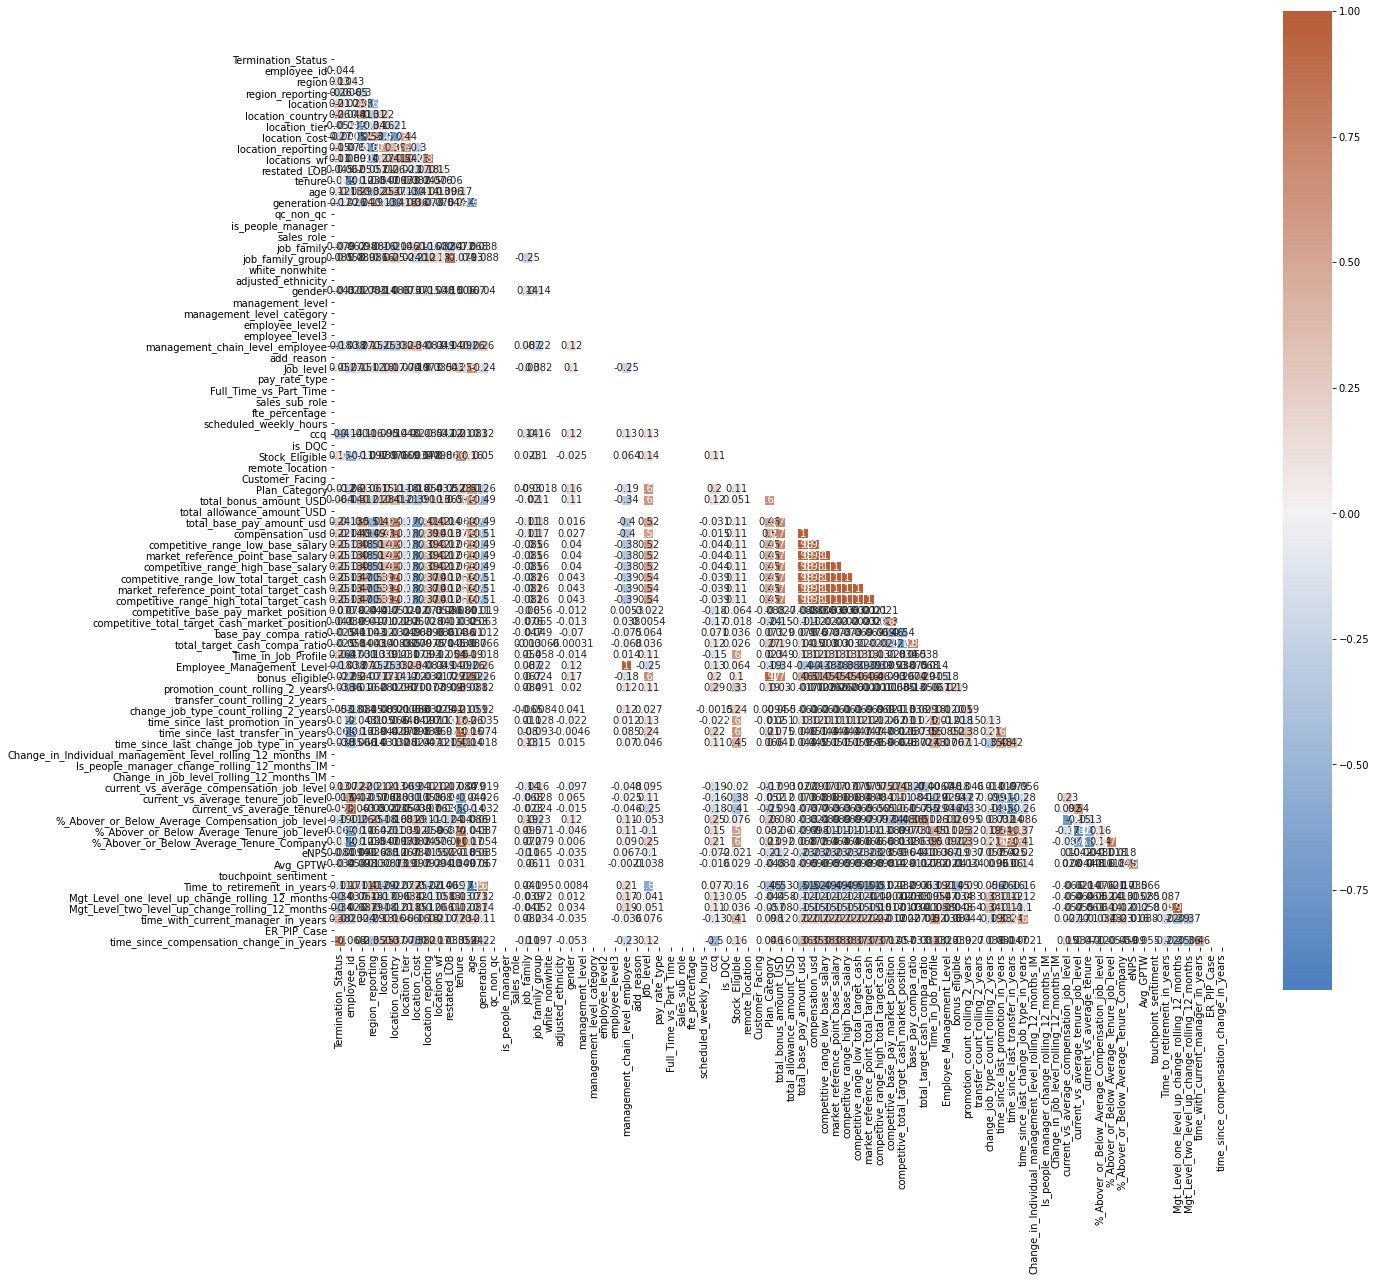

In [ ]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

##**2.9 Feature Scaling**

In [ ]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [ ]:
modified_data

###**2.9.1 September test data**

In [ ]:
My_testdata = modified_data[[ 'Termination_Status','employee_id', 'region', 'region_reporting', 'location',
       'location_country', 'location_tier', 'location_cost',
       'location_reporting', 'locations_wf', 'restated_LOB', 'tenure', 'age',
       'generation', 'job_family', 'job_family_group', 'gender',
       'management_chain_level_employee', 'Job_level', 'ccq', 'Stock_Eligible',
       'total_bonus_amount_USD', 'total_base_pay_amount_usd',
       'compensation_usd', 'competitive_range_low_base_salary',
       'market_reference_point_base_salary',
       'competitive_range_high_base_salary',
       'competitive_range_low_total_target_cash',
       'market_reference_point_total_target_cash',
       'competitive_range_high_total_target_cash',
       'competitive_base_pay_market_position',
       'competitive_total_target_cash_market_position', 'Time_in_Job_Profile',
       'Employee_Management_Level', 'bonus_eligible',
       'promotion_count_rolling_2_years',
       'change_job_type_count_rolling_2_years',
       'time_since_last_transfer_in_years',
       'time_since_last_change_job_type_in_years',
       'current_vs_average_compensation_job_level',
       'current_vs_average_tenure_job_level', 'current_vs_average_tenure',
       '%_Abover_or_Below_Average_Compensation_job_level',
       '%_Abover_or_Below_Average_Tenure_job_level',
       '%_Abover_or_Below_Average_Tenure_Company', 'eNPS',
       'Time_to_retirement_in_years',
       'Mgt_Level_one_level_up_change_rolling_12_months',
       'Mgt_Level_two_level_up_change_rolling_12_months',
       'time_with_current_manager_in_years',
       'time_since_compensation_change_in_years']]
      

##**2.10 New Feature Selection**

In [ ]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='Termination_Status']
y = modified_data[['Termination_Status']]
selector = SelectKBest(chi2, k=50)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

In [ ]:
X_aug =  modified_data[[ 'Termination_Status','employee_id', 'region', 'region_reporting', 'location',
       'location_country', 'location_tier', 'location_cost',
       'location_reporting', 'locations_wf', 'restated_LOB', 'tenure', 'age',
       'generation', 'job_family', 'job_family_group', 'gender',
       'management_chain_level_employee', 'Job_level', 'ccq', 'Stock_Eligible',
       'total_bonus_amount_USD', 'total_base_pay_amount_usd',
       'compensation_usd', 'competitive_range_low_base_salary',
       'market_reference_point_base_salary',
       'competitive_range_high_base_salary',
       'competitive_range_low_total_target_cash',
       'market_reference_point_total_target_cash',
       'competitive_range_high_total_target_cash',
       'competitive_base_pay_market_position',
       'competitive_total_target_cash_market_position', 'Time_in_Job_Profile',
       'Employee_Management_Level', 'bonus_eligible',
       'promotion_count_rolling_2_years',
       'change_job_type_count_rolling_2_years',
       'time_since_last_transfer_in_years',
       'time_since_last_change_job_type_in_years',
       'current_vs_average_compensation_job_level',
       'current_vs_average_tenure_job_level', 'current_vs_average_tenure',
       '%_Abover_or_Below_Average_Compensation_job_level',
       '%_Abover_or_Below_Average_Tenure_job_level',
       '%_Abover_or_Below_Average_Tenure_Company', 'eNPS',
       'Time_to_retirement_in_years',
       'Mgt_Level_one_level_up_change_rolling_12_months',
       'Mgt_Level_two_level_up_change_rolling_12_months',
       'time_with_current_manager_in_years',
       'time_since_compensation_change_in_years']]

In [ ]:
X_aug

,Termination_Status,employee_id,region,region_reporting,location,location_country,location_tier,location_cost,location_reporting,locations_wf,restated_LOB,tenure,age,generation,job_family,job_family_group,gender,management_chain_level_employee,Job_level,ccq,Stock_Eligible,total_bonus_amount_USD,total_base_pay_amount_usd,compensation_usd,competitive_range_low_base_salary,market_reference_point_base_salary,competitive_range_high_base_salary,competitive_range_low_total_target_cash,market_reference_point_total_target_cash,competitive_range_high_total_target_cash,competitive_base_pay_market_position,competitive_total_target_cash_market_position,Time_in_Job_Profile,Employee_Management_Level,bonus_eligible,promotion_count_rolling_2_years,change_job_type_count_rolling_2_years,time_since_last_transfer_in_years,time_since_last_change_job_type_in_years,current_vs_average_compensation_job_level,current_vs_average_tenure_job_level,current_vs_average_tenure,%_Abover_or_Below_Average_Compensation_job_level,%_Abover_or_Below_Average_Tenure_job_level,%_Abover_or_Below_Average_Tenure_Company,eNPS,Time_to_retirement_in_years,Mgt_Level_one_level_up_change_rolling_12_months,Mgt_Level_two_level_up_change_rolling_12_months,time_with_current_manager_in_years,time_since_compensation_change_in_years
14,0.0,0.756853,0.0,1.000000,0.011905,0.380952,0.5,1.0,0.235294,0.2,0.000000,0.361484,0.116279,1.000000,0.817757,0.142857,0.5,0.666667,0.2,0.875000,1.0,0.000000,0.077358,0.064118,0.061056,0.061056,0.061056,0.041077,0.041077,0.041077,0.0,0.0,0.362238,0.666667,0.0,0.5,0.5,0.422899,0.056561,0.0,0.0,0.0,0.873831,0.816363,0.361469,0.318158,0.851064,1.0,1.0,0.101796,0.203593
17,0.0,0.990830,0.5,0.333333,0.327381,1.000000,0.5,0.0,0.647059,0.8,0.000000,0.006314,0.279070,1.000000,0.074766,0.142857,0.5,0.333333,0.6,0.769008,0.0,0.382979,0.758356,0.694109,0.728035,0.728036,0.728036,0.678260,0.678259,0.678258,0.2,0.2,0.039161,0.333333,1.0,0.0,0.0,0.007387,0.018100,0.0,1.0,1.0,0.961947,0.012737,0.006311,0.384985,0.744681,0.0,0.0,0.047904,0.047904
30,0.0,0.873556,0.5,0.333333,0.130952,1.000000,0.5,0.0,0.529412,0.6,0.000000,0.171271,0.069767,0.666667,0.817757,0.142857,0.5,0.333333,0.0,0.250000,1.0,0.000000,0.436052,0.361421,0.366203,0.366201,0.366200,0.306968,0.306969,0.306970,0.2,0.2,0.489510,0.333333,0.0,0.0,0.0,0.200369,0.490950,0.0,0.0,1.0,0.711631,0.718528,0.171285,0.543464,0.936170,0.0,0.0,0.598802,0.203593
37,0.0,0.787906,0.0,0.000000,0.261905,0.142857,1.0,1.0,0.588235,0.7,0.000000,0.329124,0.209302,1.000000,0.817757,0.142857,0.5,0.666667,0.2,0.625000,1.0,0.000000,0.082795,0.068624,0.103469,0.103468,0.103468,0.075823,0.075823,0.075823,1.0,1.0,0.830070,0.666667,0.0,0.0,0.5,0.385042,0.092760,1.0,0.0,1.0,0.412389,0.575643,0.329115,0.360459,0.702128,1.0,1.0,0.203593,0.203593
44,0.0,0.865155,0.0,0.000000,0.261905,0.142857,1.0,1.0,0.588235,0.7,0.000000,0.203631,0.418605,1.000000,0.817757,0.142857,0.0,0.333333,0.4,0.625000,1.0,0.000000,0.158059,0.131007,0.126888,0.126888,0.126888,0.121016,0.121016,0.121016,0.0,0.2,0.489510,0.333333,0.0,0.0,0.5,0.238227,0.266968,0.0,1.0,1.0,0.601138,0.265961,0.203639,0.750019,0.351064,0.0,0.0,0.700599,0.203593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,1.0,0.861809,0.5,0.333333,0.130952,1.000000,0.5,0.0,0.529412,0.6,0.142857,0.138122,0.581395,0.333333,0.140187,0.190476,0.0,0.333333,0.2,0.289895,1.0,0.000000,0.203982,0.169070,0.192931,0.192928,0.192927,0.155562,0.155562,0.155562,0.2,0.2,0.489510,0.333333,0.0,0.0,0.0,0.161588,0.395928,1.0,1.0,1.0,0.210493,0.217199,0.138130,0.249981,0.468085,0.0,0.0,1.000000,0.802395
71,1.0,0.900694,0.0,0.000000,0.988095,0.738095,1.0,0.0,0.941176,0.0,0.285714,0.065509,0.279070,1.000000,0.242991,0.000000,0.0,0.333333,0.4,0.431909,1.0,0.000000,0.338667,0.280703,0.280460,0.280459,0.280459,0.220819,0.220819,0.220819,0.0,0.0,0.489510,0.333333,0.0,

##**2.11 Data spliting**

In [ ]:
X=X_aug.drop('Termination_Status',axis=1)

In [ ]:
y=X_aug[['Termination_Status']]

In [ ]:
# y
X

,employee_id,region,region_reporting,location,location_country,location_tier,location_cost,location_reporting,locations_wf,restated_LOB,tenure,age,generation,job_family,job_family_group,gender,management_chain_level_employee,Job_level,ccq,Stock_Eligible,total_bonus_amount_USD,total_base_pay_amount_usd,compensation_usd,competitive_range_low_base_salary,market_reference_point_base_salary,competitive_range_high_base_salary,competitive_range_low_total_target_cash,market_reference_point_total_target_cash,competitive_range_high_total_target_cash,competitive_base_pay_market_position,competitive_total_target_cash_market_position,Time_in_Job_Profile,Employee_Management_Level,bonus_eligible,promotion_count_rolling_2_years,change_job_type_count_rolling_2_years,time_since_last_transfer_in_years,time_since_last_change_job_type_in_years,current_vs_average_compensation_job_level,current_vs_average_tenure_job_level,current_vs_average_tenure,%_Abover_or_Below_Average_Compensation_job_level,%_Abover_or_Below_Average_Tenure_job_level,%_Abover_or_Below_Average_Tenure_Company,eNPS,Time_to_retirement_in_years,Mgt_Level_one_level_up_change_rolling_12_months,Mgt_Level_two_level_up_change_rolling_12_months,time_with_current_manager_in_years,time_since_compensation_change_in_years
14,0.756853,0.0,1.000000,0.011905,0.380952,0.5,1.0,0.235294,0.2,0.000000,0.361484,0.116279,1.000000,0.817757,0.142857,0.5,0.666667,0.2,0.875000,1.0,0.000000,0.077358,0.064118,0.061056,0.061056,0.061056,0.041077,0.041077,0.041077,0.0,0.0,0.362238,0.666667,0.0,0.5,0.5,0.422899,0.056561,0.0,0.0,0.0,0.873831,0.816363,0.361469,0.318158,0.851064,1.0,1.0,0.101796,0.203593
17,0.990830,0.5,0.333333,0.327381,1.000000,0.5,0.0,0.647059,0.8,0.000000,0.006314,0.279070,1.000000,0.074766,0.142857,0.5,0.333333,0.6,0.769008,0.0,0.382979,0.758356,0.694109,0.728035,0.728036,0.728036,0.678260,0.678259,0.678258,0.2,0.2,0.039161,0.333333,1.0,0.0,0.0,0.007387,0.018100,0.0,1.0,1.0,0.961947,0.012737,0.006311,0.384985,0.744681,0.0,0.0,0.047904,0.047904
30,0.873556,0.5,0.333333,0.130952,1.000000,0.5,0.0,0.529412,0.6,0.000000,0.171271,0.069767,0.666667,0.817757,0.142857,0.5,0.333333,0.0,0.250000,1.0,0.000000,0.436052,0.361421,0.366203,0.366201,0.366200,0.306968,0.306969,0.306970,0.2,0.2,0.489510,0.333333,0.0,0.0,0.0,0.200369,0.490950,0.0,0.0,1.0,0.711631,0.718528,0.171285,0.543464,0.936170,0.0,0.0,0.598802,0.203593
37,0.787906,0.0,0.000000,0.261905,0.142857,1.0,1.0,0.588235,0.7,0.000000,0.329124,0.209302,1.000000,0.817757,0.142857,0.5,0.666667,0.2,0.625000,1.0,0.000000,0.082795,0.068624,0.103469,0.103468,0.103468,0.075823,0.075823,0.075823,1.0,1.0,0.830070,0.666667,0.0,0.0,0.5,0.385042,0.092760,1.0,0.0,1.0,0.412389,0.575643,0.329115,0.360459,0.702128,1.0,1.0,0.203593,0.203593
44,0.865155,0.0,0.000000,0.261905,0.142857,1.0,1.0,0.588235,0.7,0.000000,0.203631,0.418605,1.000000,0.817757,0.142857,0.0,0.333333,0.4,0.625000,1.0,0.000000,0.158059,0.131007,0.126888,0.126888,0.126888,0.121016,0.121016,0.121016,0.0,0.2,0.489510,0.333333,0.0,0.0,0.5,0.238227,0.266968,0.0,1.0,1.0,0.601138,0.265961,0.203639,0.750019,0.351064,0.0,0.0,0.700599,0.203593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,0.861809,0.5,0.333333,0.130952,1.000000,0.5,0.0,0.529412,0.6,0.142857,0.138122,0.581395,0.333333,0.140187,0.190476,0.0,0.333333,0.2,0.289895,1.0,0.000000,0.203982,0.169070,0.192931,0.192928,0.192927,0.155562,0.155562,0.155562,0.2,0.2,0.489510,0.333333,0.0,0.0,0.0,0.161588,0.395928,1.0,1.0,1.0,0.210493,0.217199,0.138130,0.249981,0.468085,0.0,0.0,1.000000,0.802395
71,0.900694,0.0,0.000000,0.988095,0.738095,1.0,0.0,0.941176,0.0,0.285714,0.065509,0.279070,1.000000,0.242991,0.000000,0.0,0.333333,0.4,0.431909,1.0,0.000000,0.338667,0.280703,0.280460,0.280459,0.280459,0.220819,0.220819,0.220819,0.0,0.0,0.489510,0.333333,0.0,0.0,0.5,0.076639,0.033937,0.0,1.0,1.0,0.713906,0.08

##**2.12 Spliting data for september**

In [ ]:
X_sep = My_testdata.drop('Termination_Status',axis=1)


In [ ]:
y_sep=My_testdata[['Termination_Status']]

In [ ]:
y_sep

In [ ]:
X_sep

#**3 Data spliting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# **4- Model Training**

##**4.1-Decision Trees**

In [ ]:
DTC=DecisionTreeClassifier(random_state=0, max_depth=2)
DTC= DTC.fit(X_train , y_train)
DTC

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred1 = DTC.predict(X_test)
dt=DTC.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(DTC.score(X_test, y_test)))

Accuracy score= 0.9403


In [ ]:
#  accuracy on september Data
y_pred2 = DTC.predict(X_sep)
dt2=DTC.score(X_sep, y_sep)
print('Accuracy score= {:.4f}'.format(DTC.score(X_sep, y_sep)))

Accuracy score= 0.9230


### **4.1.1 -Confusion Matrix**

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()



confusion matrix


[[973   3]
 [100 261]]




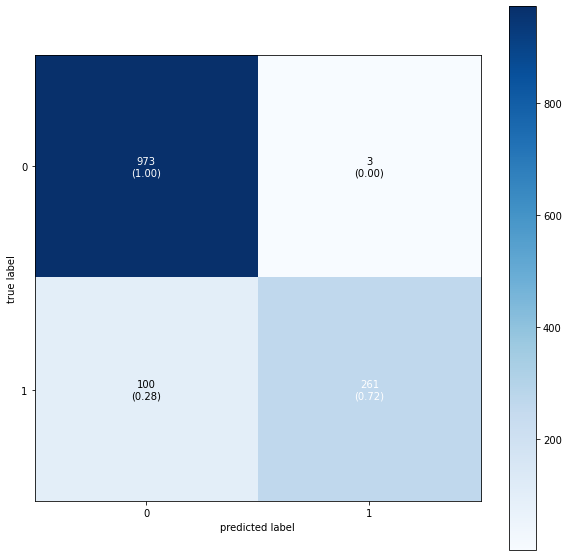

In [ ]:
#  Confusion matrix on September data
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_sep, y_pred2)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **4.1.2-Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')

In [ ]:
#  Precision on september data
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_sep, y_pred2)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       976
         1.0       0.99      0.72      0.84       361

    accuracy                           0.92      1337
   macro avg       0.95      0.86      0.89      1337
weighted avg       0.93      0.92      0.92      1337





### **4.1.3-ROC CURVE**

In [ ]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

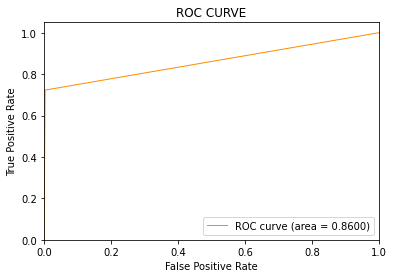

In [ ]:
#  ROC CURVE on september data
fpr11, tpr11, thresholds = roc_curve(y_sep, y_pred2)
roc_auc = auc(fpr11, tpr11)
plt.figure()
plt.plot(fpr11, tpr11, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **4.2-Random Forest**

In [ ]:
Ran_For= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=10)
Ran_For= Ran_For.fit(X_train , y_train)
Ran_For

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [ ]:
y_pred1 = Ran_For.predict(X_test)
rn=Ran_For.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(Ran_For.score(X_test, y_test)))

Accuracy score= 0.9577


In [ ]:
#  accuracy on september data
y_pred3 = Ran_For.predict(X_sep)
rn2=Ran_For.score(X_sep, y_sep)
print('Accuracy score= {:.4f}'.format(Ran_For.score(X_sep, y_sep)))

Accuracy score= 0.9506


### **4.2.1-Confusion Matrix**

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
#  Confuse martix for septenber data
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_sep, y_pred3)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **4.2.2  Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')

In [ ]:
#  Precision fro september 

print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_sep, y_pred3)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       976
         1.0       0.99      0.83      0.90       361

    accuracy                           0.95      1337
   macro avg       0.96      0.91      0.93      1337
weighted avg       0.95      0.95      0.95      1337





### **4.2.3 ROC CURVE**

In [ ]:
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr2, tpr2)
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

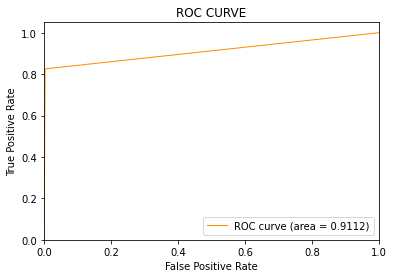

In [ ]:
#  Roc fpr september data
fpr21, tpr21, thresholds = roc_curve(y_sep, y_pred3)
roc_auc = auc(fpr21, tpr21)
plt.figure()
plt.plot(fpr21, tpr21, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **4.3 SVM Support Vector Machine**

In [ ]:
svc=LinearSVC(random_state=0, tol=1e-5)
svc= svc.fit(X_train , y_train)
svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [ ]:
y_pred1 = svc.predict(X_test)
sv=svc.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(svc.score(X_test, y_test)))

In [ ]:
#  accuracy for sep data 

y_pred4 = svc.predict(X_sep)
sv2=svc.score(X_sep, y_sep)
print('Accuracy score= {:.4f}'.format(svc.score(X_sep, y_sep)))

Accuracy score= 0.9357


### **4.3.1- Confusion Matrix**

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()



confusion matrix


[[966  10]
 [ 76 285]]




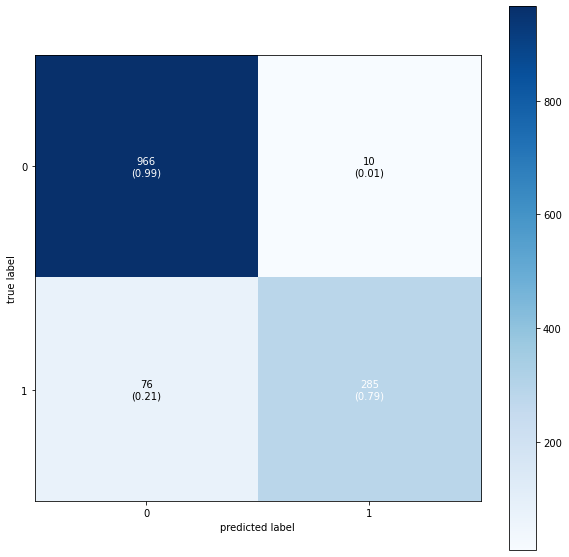

In [ ]:
#  confusion for sep data

print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_sep, y_pred4)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **4.3.2-Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')

In [ ]:
#  Precision for september
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_sep, y_pred4)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       976
         1.0       0.97      0.79      0.87       361

    accuracy                           0.94      1337
   macro avg       0.95      0.89      0.91      1337
weighted avg       0.94      0.94      0.93      1337





### **4.3.3-ROC CURVE**

In [ ]:
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr3, tpr3)
plt.figure()
plt.plot(fpr3, tpr3, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

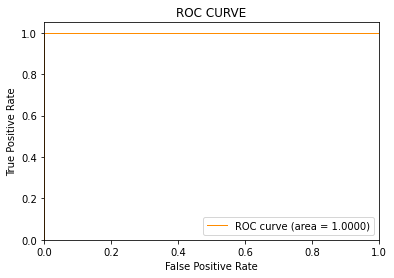

In [ ]:
#  ROC for september data 
fpr31, tpr31, thresholds = roc_curve(y_sep, y_sep)
roc_auc = auc(fpr31, tpr31)
plt.figure()
plt.plot(fpr31, tpr31, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **4.4-Logistic Regression**

In [ ]:
LR= LogisticRegression()
LR= LR.fit(X_train , y_train)
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred1 = LR.predict(X_test)
lr=LR.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LR.score(X_test, y_test)))

Accuracy score= 0.9527


In [ ]:
#  Logistic  fro  sep data 
y_pred5 = LR.predict(X_sep)
lr2=LR.score(X_sep, y_sep)
print('Accuracy score= {:.4f}'.format(LR.score(X_sep, y_sep)))

Accuracy score= 0.9274


### **4.4.1-Confusion Matrix**

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()



confusion matrix


[[971   5]
 [ 92 269]]




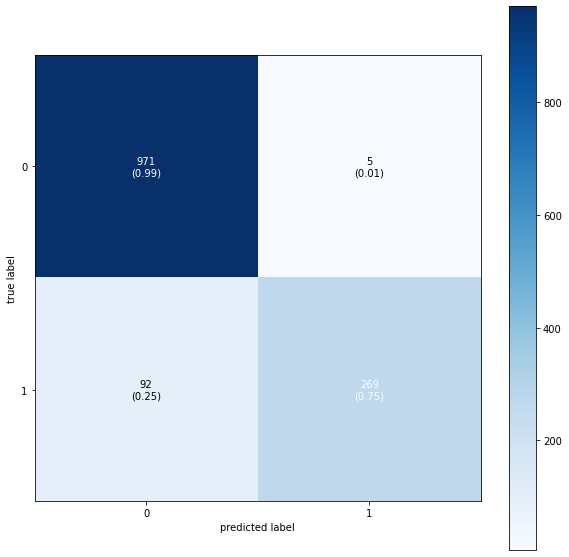

In [ ]:
#  confusion  for sep data 
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_sep, y_pred5)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **4.4.2 Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')

In [ ]:
# percision for sep data 
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_sep, y_pred5)
print(CR)
print('\n')

### **4.4.3-ROC CURVE**

In [ ]:
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr4, tpr4)
plt.figure()
plt.plot(fpr4, tpr4, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

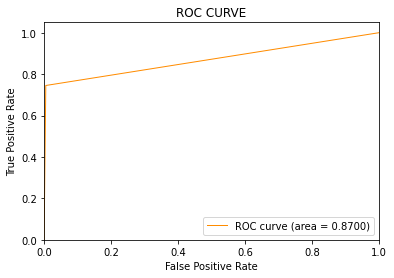

In [ ]:
#  ROC fro sep data
fpr41, tpr41, thresholds = roc_curve(y_sep, y_pred5)
roc_auc = auc(fpr41, tpr41)
plt.figure()
plt.plot(fpr41, tpr41, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **4.5-KNN Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
KNN=GaussianNB()
KNN= KNN.fit(X_train , y_train)
KNN

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred1 = KNN.predict(X_test)
kn=KNN.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(KNN.score(X_test, y_test)))

Accuracy score= 0.8507


In [ ]:
#  Knn for sep data 
y_pred6 = KNN.predict(X_sep)
kn2=KNN.score(X_sep, y_sep)
print('Accuracy score= {:.4f}'.format(KNN.score(X_sep, y_sep)))

Accuracy score= 0.8175


### **4.5.1-Confusion Matrix**

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()



confusion matrix


[[834 142]
 [102 259]]




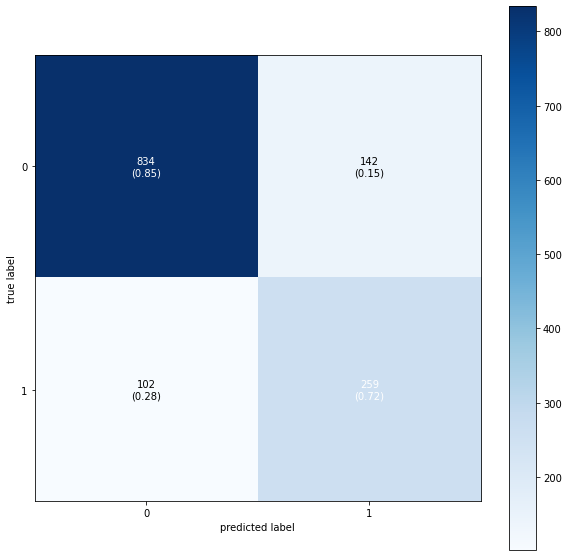

In [ ]:
#  confusion for the sep data
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_sep, y_pred6)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **4.5.2-Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')

In [ ]:
#  precision for sep data
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_sep, y_pred6)
print(CR)
print('\n')

### **4.5.3-ROC CURVE**

In [ ]:
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr5, tpr5)
plt.figure()
plt.plot(fpr5, tpr5, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

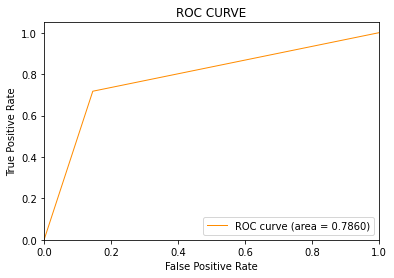

In [ ]:
#  ROC fro sep data 
fpr51, tpr51, thresholds = roc_curve(y_sep, y_pred6)
roc_auc = auc(fpr51, tpr51)
plt.figure()
plt.plot(fpr51, tpr51, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **5-Models Evaluiton** 

## **5.1-ROC Curve for Models**

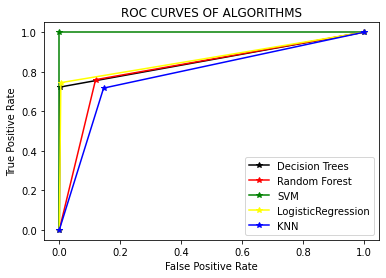

In [ ]:
plt.plot(fpr1, tpr1, marker='*', label='Decision Trees', color = 'black')
plt.plot(fpr2, tpr2, marker='*', label='Random Forest', color = 'Red')
plt.plot(fpr3, tpr3, marker='*', label='SVM', color = 'green')
plt.plot(fpr4, tpr4, marker='*', label='LogisticRegression', color = 'yellow')
plt.plot(fpr5, tpr5, marker='*', label='KNN', color = 'blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

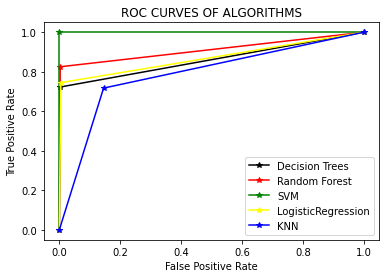

In [ ]:
# compersion on sep data
plt.plot(fpr11, tpr11, marker='*', label='Decision Trees', color = 'black')
plt.plot(fpr21, tpr21, marker='*', label='Random Forest', color = 'Red')
plt.plot(fpr31, tpr31, marker='*', label='SVM', color = 'green')
plt.plot(fpr41, tpr41, marker='*', label='LogisticRegression', color = 'yellow')
plt.plot(fpr51, tpr51, marker='*', label='KNN', color = 'blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

## **5.2-Comparison of all algorithms Results**

In [ ]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(dt,4)])
x.add_row(["Random Forest Algorithm", round(rn,4)])
x.add_row(["Support Vector Machine Algorithm", round(sv,4)])
x.add_row(["LogisticRegression Algorithm", round(lr,4)])
x.add_row(["KNN Algorithm", round(kn,4)])
print(x)
print('\n')

In [ ]:
#  for sep data

x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(dt2,4)])
x.add_row(["Random Forest Algorithm", round(rn2,4)])
x.add_row(["Support Vector Machine Algorithm", round(sv2,4)])
x.add_row(["LogisticRegression Algorithm", round(lr2,4)])
x.add_row(["KNN Algorithm", round(kn2,4)])
print(x)
print('\n')



Comparison of all algorithm results
+----------------------------------+----------+
|              Model               | Accuracy |
+----------------------------------+----------+
|     Decision Trees Algorithm     |  0.923   |
|     Random Forest Algorithm      |  0.9506  |
| Support Vector Machine Algorithm |  0.9357  |
|   LogisticRegression Algorithm   |  0.9274  |
|          KNN Algorithm           |  0.8175  |
+----------------------------------+----------+




## **5.3-Best Model with Accuracy and Time of execution**

In [ ]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Random Forest Algorithm", round(rn,4)])

print(x)
print('\n')

In [ ]:
#  for sep data
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Random Forest Algorithm", round(rn2,4)])

print(x)
print('\n')



Comparison of all algorithm results
+-------------------------+----------+
|          Model          | Accuracy |
+-------------------------+----------+
| Random Forest Algorithm |  0.9506  |
+-------------------------+----------+




#**13- Train on all training data now to make it more good on more data**

## **13.1 Logistic Regression**

In [ ]:
Ran_For= LogisticRegression()
Ran_For= Ran_For.fit(X , y)
Ran_For

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **13.1.1 Selecting the Test data of 8997 rows**

In [ ]:
Testdata=normalized_data_with_selected_features.tail(8997)

In [ ]:
Testdata

### **13.1.2 As we are going to Predict the 'Termination_Status' so we dont need this**

In [ ]:
Testdata=Testdata.drop(columns=['Termination_Status'])
Testdata

### **13.1.3 Getting Probabilties on the Test data using Decision Trees Trained Model**

In [ ]:
predictions=Ran_For.predict_proba(Testdata)
predictions = np.amax(predictions, axis=1)
predictions

array([0.89484018, 0.99981501, 0.99123215, ..., 0.99817415, 0.99826815,
       0.99853741])

In [ ]:
Pred=pd.DataFrame()
Pred['Test data predictions probabilties']=predictions
Pred['Test data predictions probabilties']=round(Pred['Test data predictions probabilties'],2)
Pred['Test data predictions probabilties']

0       0.89
1       1.00
2       0.99
3       0.98
4       0.99
        ... 
8992    1.00
8993    1.00
8994    1.00
8995    1.00
8996    1.00
Name: Test data predictions probabilties, Length: 8997, dtype: float64

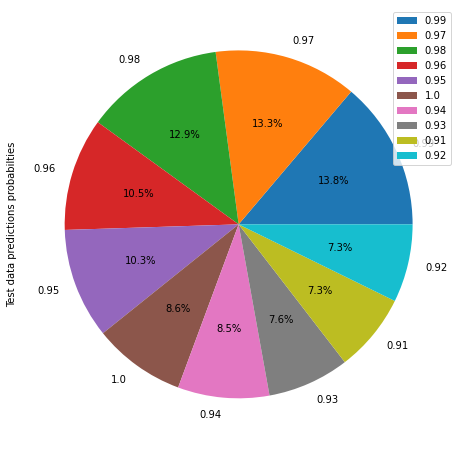

In [ ]:
Pred['Test data predictions probabilties'].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()


In [ ]:
Pred['Test data predictions probabilties'].value_counts()

0.99    835
0.97    805
0.98    780
0.96    635
0.95    620
1.00    519
0.94    514
0.93    460
0.91    441
0.92    439
0.90    411
0.89    332
0.88    326
0.87    274
0.86    256
0.85    209
0.84    169
0.83    158
0.82    121
0.81    106
0.80     85
0.79     67
0.78     58
0.77     44
0.76     43
0.75     25
0.69     23
0.74     22
0.73     22
0.66     19
0.70     18
0.71     16
0.72     16
0.59     14
0.67     13
0.58     10
0.51      9
0.54      9
0.62      9
0.65      9
0.55      8
0.61      7
0.52      7
0.63      7
0.68      6
0.64      5
0.60      5
0.57      4
0.56      3
0.50      3
0.53      1
Name: Test data predictions probabilties, dtype: int64

## **13.2-Getting Prediction on the Test data using Decision Trees Trained Model**

In [ ]:
predictions=DTC.predict(Testdata)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
Pred['Test data predictions']=predictions
Pred['Test data predictions']=Pred['Test data predictions'].replace(0,'Yes')
Pred['Test data predictions']=Pred['Test data predictions'].replace(1,'No')
Pred

,Test data predictions probabilties,Test data predictions
0,0.89,No
1,1.00,No
2,0.99,No
3,0.98,No
4,0.99,No
...,...,...
8992,1.00,No
8993,1.00,No
8994,1.00,No
8995,1.00,No


# **14-Percentage of Predictions that are going to terminate is 1% and percentage of predictions that are not going to terminate are 99%**

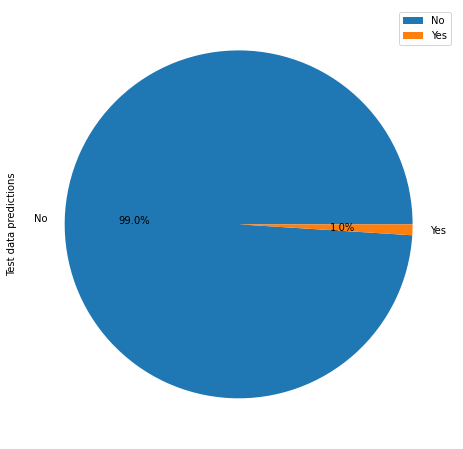

In [ ]:
Pred['Test data predictions'].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()


In [ ]:
Pred['Test data predictions'].value_counts()

No     8907
Yes      90
Name: Test data predictions, dtype: int64

# **15-Saving the probabilties and predictions in the last column of test data as Predictions**

In [ ]:
Test_data['Test data predictions']=Pred['Test data predictions probabilties']
Test_data['Test data predictions']=Pred['Test data predictions']

In [ ]:
Test_data.to_csv('Headcount Test with Predictions probabilties Sep.csv')
print('Headcount Test with Predictions probabilties file saved')

Headcount Test with Predictions probabilties file saved
